In [49]:
# Case Study 4: Air Quality Prediction in Urban Areas 
# Problem Statement: Air pollution is a severe challenge in urban areas, impacting public 
# health and the environment. Accurately predicting air quality levels can help city officials 
# take timely actions to reduce emissions or warn the public. Traditional methods of monitoring 
# air quality are limited by the number of sensors and real-time reporting. AI models can fill 
# these gaps by using available sensor data combined with weather and traffic information. 
# Real-Life Example: In Delhi, one of the most polluted cities in the world, a local 
# environmental agency used AI to predict air quality indices (AQI) with a 24-hour lead time. 
# By analyzing traffic, meteorological data, and pollutant levels, the model helped the city issue 
# early warnings, allowing citizens to take preventive measures, such as staying indoors or 
# reducing outdoor activities on high-pollution days. 
# Dataset: You are provided with air quality data (PM2.5, PM10, NO2, CO), traffic data, and 
# weather conditions over three years.  

In [1]:
import os
import pandas as pd

# Define the file path
file_path = "city_day.csv"

# Check if the file exists
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    print(df.head())  # Display the first few rows of the dataframe
else:
    print(f"File not found: {file_path}")


File found: city_day.csv
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [2]:
train_df = pd.read_csv('city_day.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
display(train_df.head())

Train Dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
train_df.shape
train_df.dtypes
train_df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
#DATA CLEANING

In [5]:
#Fill the blank cells with the mean of the values
mean=train_df['PM2.5'].mean()
mean=int(mean)
train_df['PM2.5']=train_df['PM2.5'].fillna(mean)

In [6]:
mean=train_df['PM10'].mean()
mean=int(mean)
train_df['PM10'] = train_df['PM10'].fillna(mean)

In [7]:
mean=train_df['NO'].mean()
mean=int(mean)
train_df['NO'] = train_df['NO'].fillna(mean)

In [8]:
mean=train_df['NO2'].mean()
mean=int(mean)
train_df['NO2'] = train_df['NO2'].fillna(mean)

In [9]:
mean=train_df['CO'].mean()
mean=int(mean)
train_df['CO'] = train_df['CO'].fillna(mean)

In [10]:
mean=train_df['SO2'].mean()
mean=int(mean)
train_df['SO2'] = train_df['SO2'].fillna(mean)

In [11]:
mean=train_df['O3'].mean()
mean=int(mean)
train_df['O3'] = train_df['O3'].fillna(mean)

In [12]:
mean=train_df['AQI'].mean()
mean=int(mean)
train_df['AQI'] = train_df['AQI'].fillna(mean)

In [13]:
#Checking how many null values are left
train_df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [14]:
#Removing the columns with null values
train_df=train_df.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)

In [15]:
#Displaying the remaining columns
train_df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [17]:
# Display the first 10 rows of the dataset to get a quick overview of the data
train_df.head(10)

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.0,118.0,0.92,18.22,0.92,27.64,133.36,166.0
1,67.0,118.0,0.97,15.69,0.97,24.55,34.06,166.0
2,67.0,118.0,17.40,19.30,17.40,29.07,30.70,166.0
3,67.0,118.0,1.70,18.48,1.70,18.59,36.08,166.0
4,67.0,118.0,22.10,21.42,22.10,39.33,39.31,166.0
5,67.0,118.0,45.41,38.48,45.41,45.76,46.51,166.0
6,67.0,118.0,112.16,40.62,112.16,32.28,33.47,166.0
7,67.0,118.0,80.87,36.74,80.87,38.54,31.89,166.0
8,67.0,118.0,29.16,31.00,29.16,58.68,25.75,166.0
9,67.0,118.0,17.00,7.04,2.00,8.29,4.55,166.0


File found: city_day.csv
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


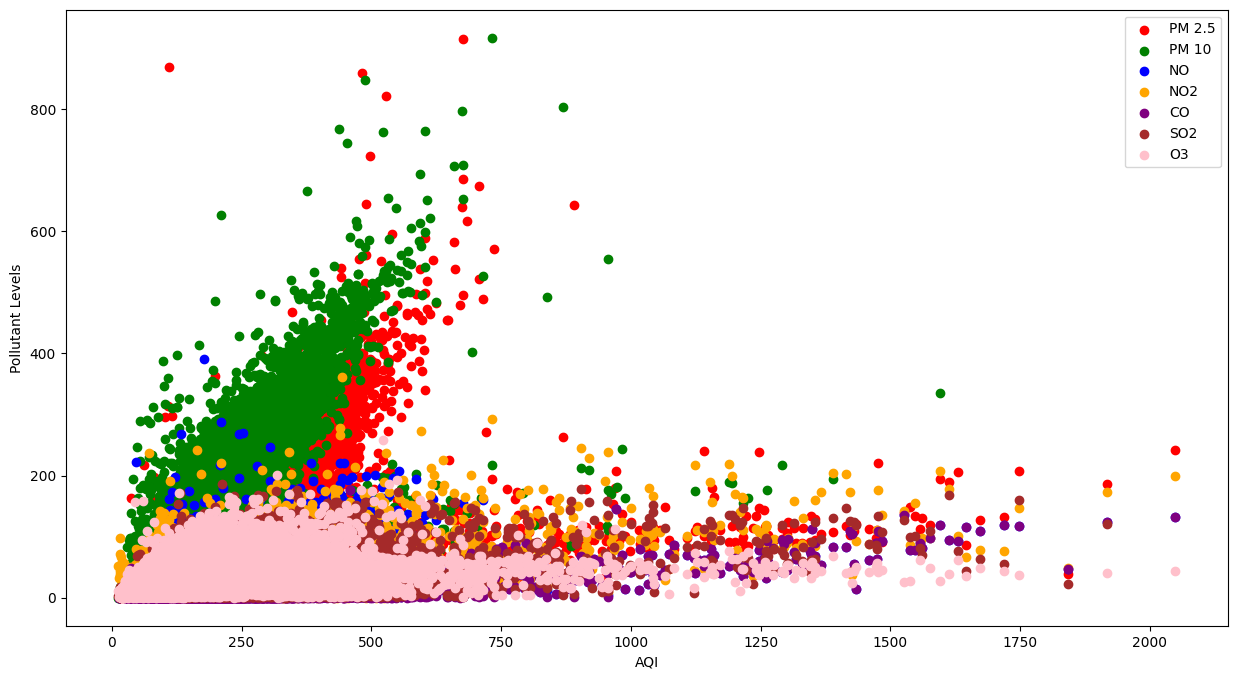

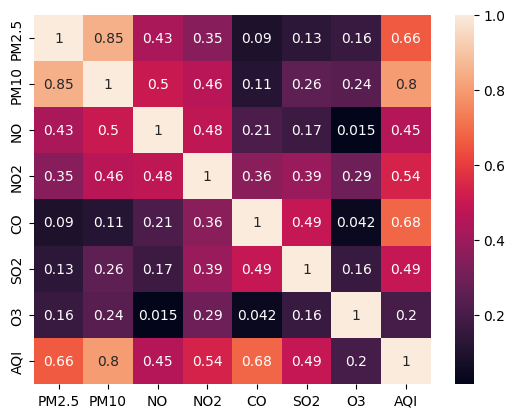

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = "city_day.csv"

# Check if the file exists and load the data
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    
    # Read the CSV file into a DataFrame
    prepareddata = pd.read_csv(file_path)
    
    # Display the first few rows of the DataFrame
    print(prepareddata.head())
else:
    print(f"File not found: {file_path}")

# Generate descriptive statistics for the dataset
prepareddata.describe()

# Scatter plot showing the relationship between AQI and different pollutants
x = prepareddata['AQI']
y1 = prepareddata['PM2.5']
y2 = prepareddata['PM10']
y3 = prepareddata['NO']
y4 = prepareddata['NO2']
y5 = prepareddata['CO']
y6 = prepareddata['SO2']
y7 = prepareddata['O3']

plt.figure(figsize=(15, 8))
plt.scatter(x, y1, label='PM 2.5', color='red')
plt.scatter(x, y2, label='PM 10', color='green')
plt.scatter(x, y3, label='NO', color='blue')
plt.scatter(x, y4, label='NO2', color='orange')
plt.scatter(x, y5, label='CO', color='purple')
plt.scatter(x, y6, label='SO2', color='brown')
plt.scatter(x, y7, label='O3', color='pink')
plt.xlabel('AQI')
plt.ylabel('Pollutant Levels')
plt.legend()
plt.show()

# Compute the correlation matrix for the dataset and visualize it using a heatmap
corr = prepareddata[['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
#DATA VISUALIZATION

In [19]:
# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

# Making sure that plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Seaborn for enhanced visualizations
import seaborn as sns


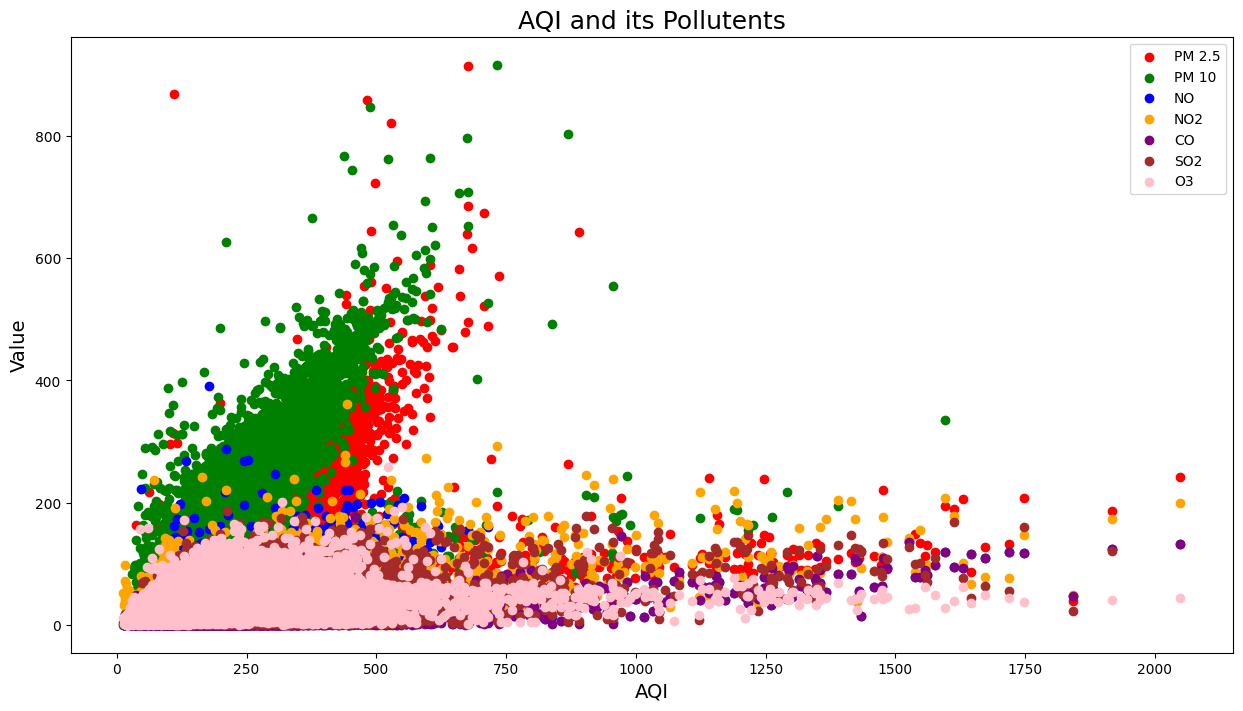

In [20]:
# Scatter plot showing the relationship between AQI and different pollutants
x=prepareddata['AQI']
y1=prepareddata['PM2.5']
y2=prepareddata['PM10']
y3=prepareddata['NO']
y4=prepareddata['NO2']
y5=prepareddata['CO']
y6=prepareddata['SO2']
y7=prepareddata['O3']
plt.figure(figsize=(15,8))
plt.scatter(x, y1, label='PM 2.5', color='red')
plt.scatter(x, y2, label='PM 10', color='green')
plt.scatter(x, y3, label='NO', color='blue')
plt.scatter(x, y4, label='NO2', color='orange')
plt.scatter(x, y5, label='CO', color='purple')
plt.scatter(x, y6, label='SO2', color='brown')
plt.scatter(x, y7, label='O3', color='pink')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

<Axes: >

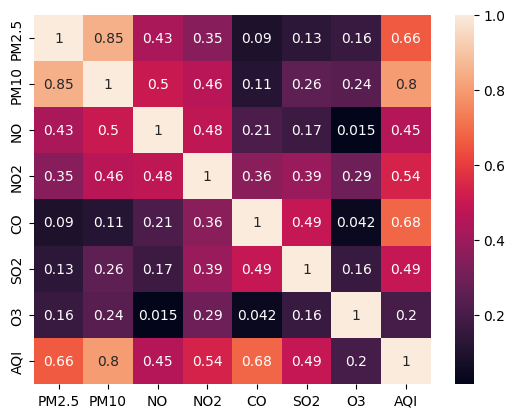

In [21]:
# Compute the correlation matrix for the dataset and visualize it using a heatmap
corr = prepareddata[['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()
sns.heatmap(corr, annot=True)

In [22]:
#DATA TRAINING

In [23]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have Air Quality Index(AQI).
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]  
y=prepareddata['AQI']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
#MODEL CREATION

In [26]:
#LINEAR REGRESSION
#Import required libraries/model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [27]:
from sklearn.impute import SimpleImputer

# Fitting data into the model.
# Handling missing values in x_train and y_train before fitting the model

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Fit the model with the imputed data
# Impute missing values in y_train
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Fit the model with the imputed data
reg1.fit(x_train_imputed, y_train_imputed)

LinearRegression()

In [29]:
from sklearn.impute import SimpleImputer
import numpy as np

# Example data
x_train = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]])
x_test = np.array([[np.nan, 2, 3], [4, 5, np.nan]])

# Initialize the imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(x_train)

# Transform the test data
x_test_imputed = imputer.transform(x_test)

print(x_test_imputed)

[[4.  2.  3. ]
 [4.  5.  7.5]]


In [40]:
print("Accuracy of the Linear Regression model : \n ") 
print(reg1.score(x_train_imputed, y_train_imputed))

Accuracy of the Linear Regression model : 
 
0.7967537465886627


In [30]:
#DECISION TREE REGRESSOR

In [31]:
# Importing decision tree regressor library/model 
from sklearn.tree import DecisionTreeRegressor 
reg4 = DecisionTreeRegressor()

File found: city_day.csv
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
x_train_imputed shape: (19880, 7)
y_train_imputed shape: (19880,)
              PM2.5          PM10            NO           NO2           NOx  \
count  24172.000000

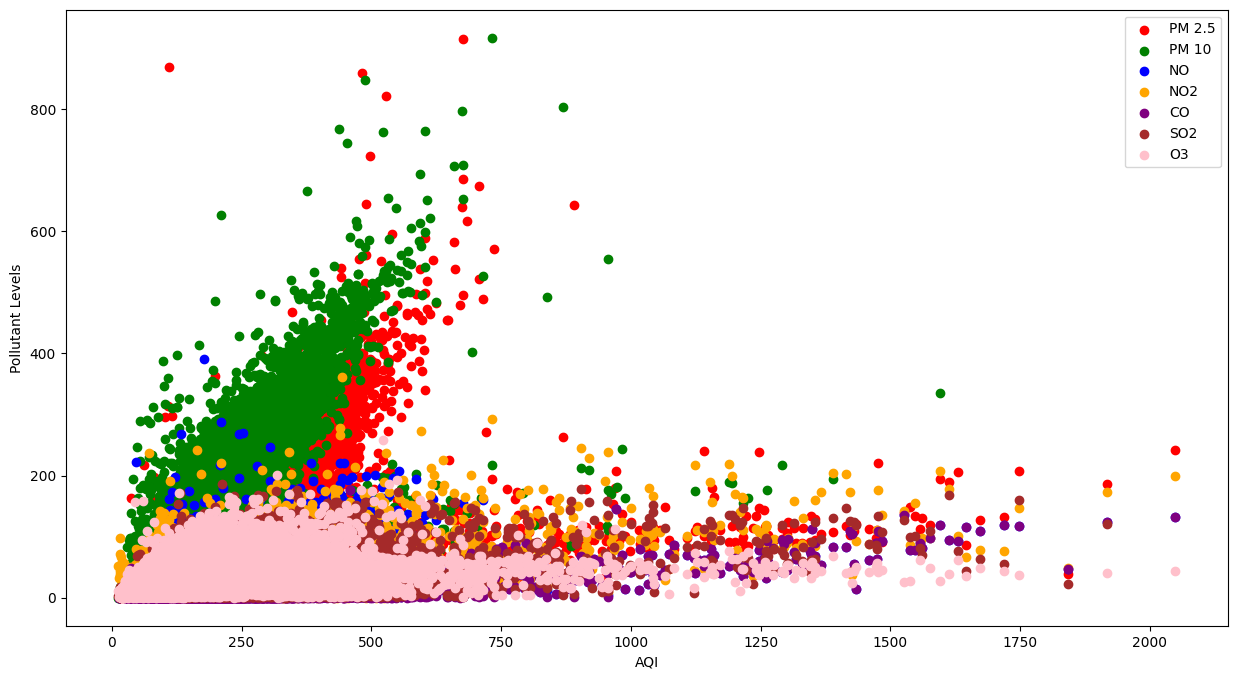

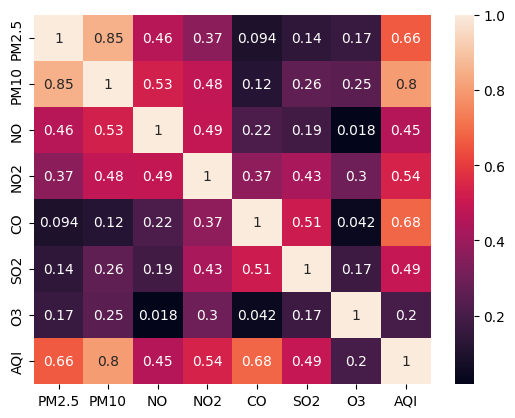

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Define the file path
file_path = "city_day.csv"

# Check if the file exists and load the data
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Display the first few rows of the DataFrame
    print(data.head())
else:
    print(f"File not found: {file_path}")

# Remove samples with missing target values
data = data.dropna(subset=['AQI'])

# Define features and target
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3']]
y = data['AQI']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Ensure y_train and y_test are aligned with x_train_imputed and x_test_imputed
y_train_imputed = y_train.values
y_test_imputed = y_test.values

# Check the shapes
print(f"x_train_imputed shape: {x_train_imputed.shape}")
print(f"y_train_imputed shape: {y_train_imputed.shape}")

# Initialize the model
reg4 = DecisionTreeRegressor()

# Fit the model
reg4.fit(x_train_imputed, y_train_imputed)

# Generate descriptive statistics for the dataset
print(data.describe())

# Scatter plot showing the relationship between AQI and different pollutants
x = data['AQI']
y1 = data['PM2.5']
y2 = data['PM10']
y3 = data['NO']
y4 = data['NO2']
y5 = data['CO']
y6 = data['SO2']
y7 = data['O3']

plt.figure(figsize=(15, 8))
plt.scatter(x, y1, label='PM 2.5', color='red')
plt.scatter(x, y2, label='PM 10', color='green')
plt.scatter(x, y3, label='NO', color='blue')
plt.scatter(x, y4, label='NO2', color='orange')
plt.scatter(x, y5, label='CO', color='purple')
plt.scatter(x, y6, label='SO2', color='brown')
plt.scatter(x, y7, label='O3', color='pink')
plt.xlabel('AQI')
plt.ylabel('Pollutant Levels')
plt.legend()
plt.show()

# Compute the correlation matrix for the dataset and visualize it using a heatmap
corr = data[['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [33]:
pred4 = reg4.predict(x_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [34]:
print("Accuracy of the Decision Tree Regressor : \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor : 
 
0.9776755592611731


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


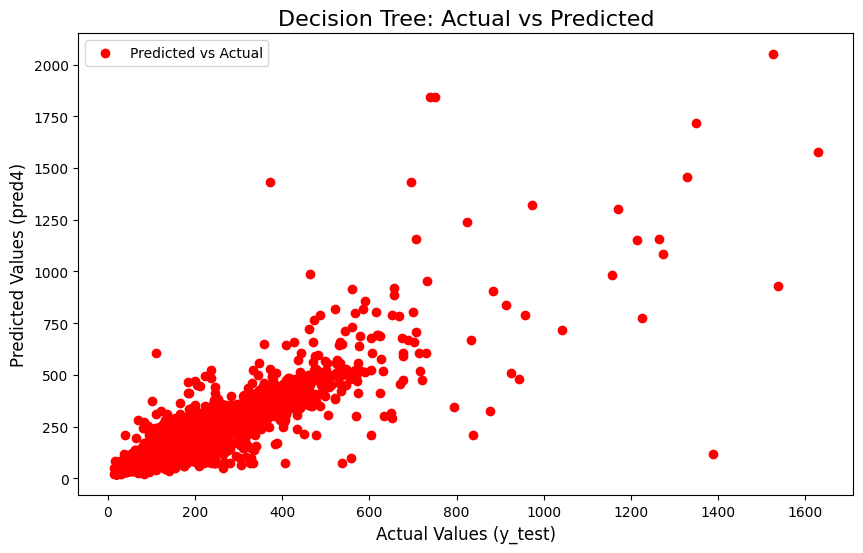

Accuracy of the Decision Tree Regressor model on the test set (R-squared): 0.7733


In [35]:
import matplotlib.pyplot as plt
#Importing libraries/models for r2 score to measure the correct accuracy
from sklearn.metrics import r2_score

# Assuming x_test and y_test are already defined
pred4 = reg4.predict(x_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred4, color='red', label='Predicted vs Actual')
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (pred4)', fontsize=12)
plt.title('Decision Tree: Actual vs Predicted', fontsize=16)
plt.legend()
plt.show()

# Calculate the R-squared score to evaluate the accuracy of the model on the test set
accuracy = r2_score(y_test, pred4)
print(f"Accuracy of the Decision Tree Regressor model on the test set (R-squared): {accuracy:.4f}")

MAE: 26.90764587525151, R2 Score: 0.8744428202519579


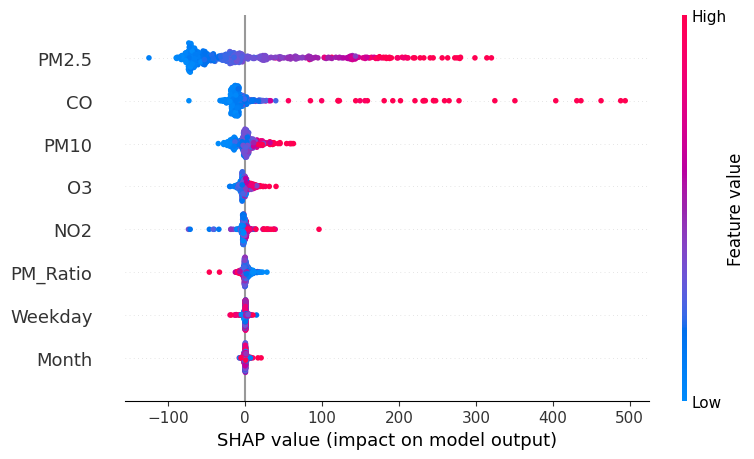

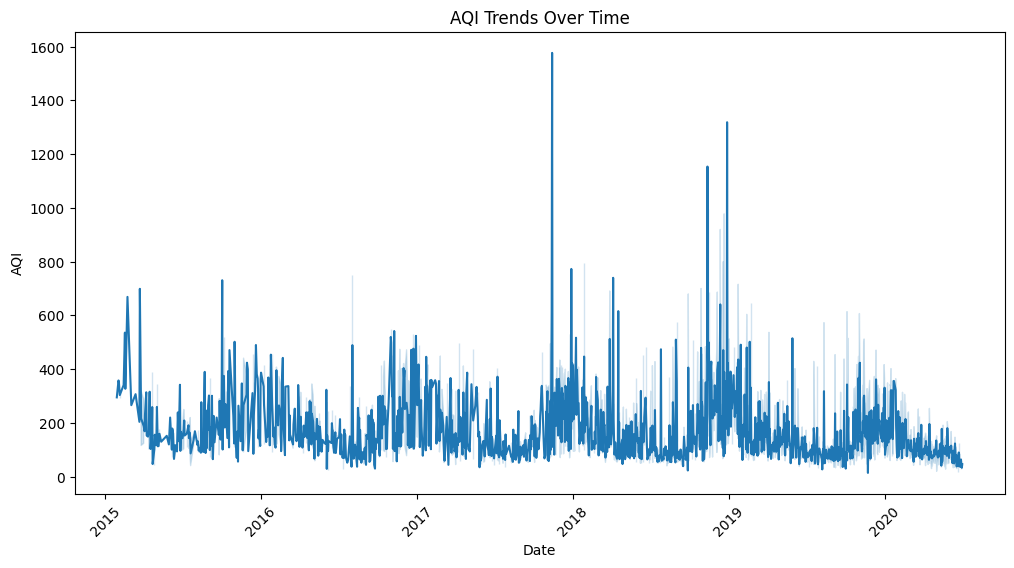

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import shap

# Load dataset
df = pd.read_csv("city_day.csv")

# Sample the data for quicker testing (e.g., 10% of the data)
df = df.sample(frac=0.1, random_state=42)

# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Handle missing values
df.dropna(inplace=True)  # Drop any remaining NaNs

# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['PM_Ratio'] = df['PM2.5'] / (df['PM10'] + 1)  # Avoid division by zero

# Train-Test Split
X = df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'Month', 'Weekday', 'PM_Ratio']]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model with fewer trees for quicker training
model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)  # Use all available cores
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R2 Score: {r2}")

# Feature Importance Visualization
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Visualization: AQI Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'], y=df['AQI'])
plt.title('AQI Trends Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import shap
from twilio.rest import Client
from flask import Flask, request, jsonify
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import optuna
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Load dataset
df = pd.read_csv("city_day.csv")

# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.dropna(inplace=True)

# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['PM_Ratio'] = df['PM2.5'] / (df['PM10'] + 1)
df['AQI_7day_avg'] = df['AQI'].rolling(window=7).mean()
df['AQI_30day_avg'] = df['AQI'].rolling(window=30).mean()
df.dropna(inplace=True)

# Train-Test Split
X = df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'Month', 'Weekday', 'PM_Ratio', 'AQI_7day_avg', 'AQI_30day_avg']]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model with Optuna Hyperparameter Tuning
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 150)  # Reduced range for faster tuning
    max_depth = trial.suggest_int("max_depth", 5, 25)  
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return mean_absolute_error(y_test, model.predict(X_test))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)  # Reduced trials for speed
best_params = study.best_params

model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Optimized MAE: {mae}, R2 Score: {r2}")

# LSTM Model for Time Series Forecasting (Optimized)
X_lstm = np.array(df[['AQI_7day_avg', 'AQI_30day_avg']])
y_lstm = np.array(df['AQI'])
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

input_layer = Input(shape=(X_lstm.shape[1], 1))
x = LSTM(16, activation='relu')(input_layer)  # Reduced size
output = Dense(1)(x)
model_lstm = Model(inputs=input_layer, outputs=output)
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_lstm, y_lstm, epochs=3, batch_size=64, verbose=0)  # Faster training

# Feature Importance using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Air Quality Map Visualization
m = folium.Map(location=[28.6139, 77.2090], zoom_start=5)
folium.Marker([28.6139, 77.2090], popup=f"Delhi AQI: {y_pred[0]}", icon=folium.Icon(color="red")).add_to(m)
m.save("aqi_map.html")

# Twilio SMS Alert System
def send_alert(aqi_value, phone_number=" "):  # Replace with actual number
    if aqi_value > 200:
        account_sid = ""
        auth_token = ""
        client = Client(account_sid, auth_token)

        message = client.messages.create(
            body=f"ALERT! AQI is too high: {aqi_value}",
            from_="+18573418633",  # Twilio phone number
            to=phone_number
        )
        print(f"Alert Sent! Message SID: {message.sid}")

# Real-Time Prediction API
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    prediction = model.predict([data['features']])
    return jsonify({"AQI Prediction": prediction.tolist()})

if __name__ == "__main__":
    app.run(debug=True)


[I 2025-02-23 17:54:49,701] A new study created in memory with name: no-name-efc210c2-f2db-457e-9a51-0bfbfa51ee2d
[I 2025-02-23 17:55:08,584] Trial 0 finished with value: 21.579804321784376 and parameters: {'n_estimators': 60, 'max_depth': 7}. Best is trial 0 with value: 21.579804321784376.
[I 2025-02-23 17:55:31,454] Trial 1 finished with value: 20.854204527961585 and parameters: {'n_estimators': 65, 'max_depth': 8}. Best is trial 1 with value: 20.854204527961585.
[I 2025-02-23 17:55:52,194] Trial 2 finished with value: 21.54715899990966 and parameters: {'n_estimators': 88, 'max_depth': 7}. Best is trial 1 with value: 20.854204527961585.
[I 2025-02-23 17:56:32,264] Trial 3 finished with value: 19.471319103300292 and parameters: {'n_estimators': 79, 'max_depth': 15}. Best is trial 3 with value: 19.471319103300292.
[I 2025-02-23 17:56:47,450] Trial 4 finished with value: 21.58431610076549 and parameters: {'n_estimators': 57, 'max_depth': 7}. Best is trial 3 with value: 19.47131910330029

Optimized MAE: 19.471319103300292, R2 Score: 0.9292466899704087
